# Natural Language Processing Project

In this NLP project we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

Let's get started!

## Imports
 **Import the usual suspects. :)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The Data

**Read the yelp.csv file and set it as a dataframe called yelp.**

In [2]:
yelp= pd.read_csv('yelp.csv')

**Check the head, info , and describe methods on yelp.**

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Create a new column called "text length" which is the number of words in the text column.**

In [6]:
yelp['text length']= yelp['text'].apply(len)
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


# EDA

**Let's explore the data**

## Imports

In [7]:
import seaborn as sns
sns.set_style('darkgrid')

**Use FacetGrid from the seaborn library to create a grid of 5 histograms of text length based off of the star ratings.**

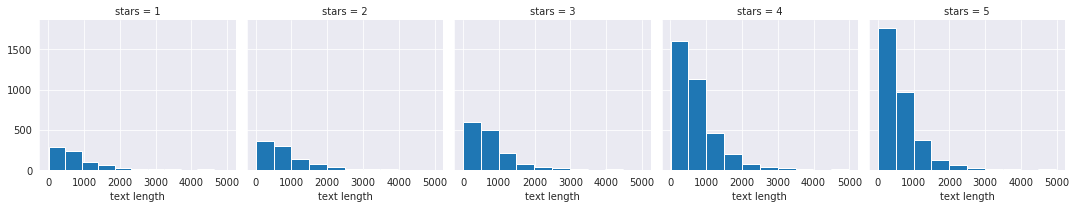

In [8]:
g= sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length')

**Create a boxplot of text length for each star category.**

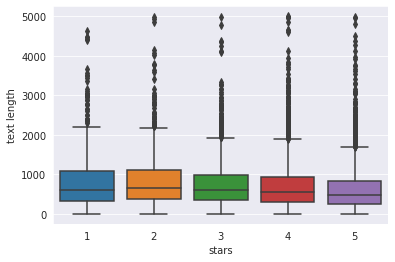

In [9]:
sns.boxplot(x=yelp['stars'], y=yelp['text length'])

**Create a countplot of the number of occurrences for each type of star rating.**

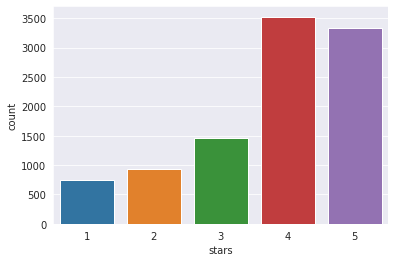

In [10]:
sns.countplot(x=yelp['stars'])

**Use groupby to get the mean values of the numerical columns .**

In [11]:
stars= yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [12]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


**Then use seaborn to create a heatmap based off that .corr() dataframe:**

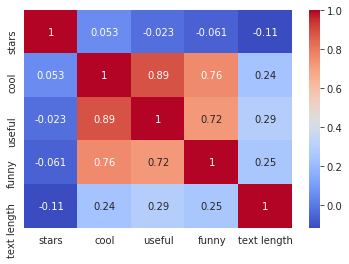

In [13]:
plt.tight_layout()
sns.heatmap(yelp.corr(), cmap='coolwarm', annot=True)

## NLP Classification Task

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [14]:
yelp_class= yelp[(yelp['stars']==1) | (yelp['stars']==5)]
yelp_class.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


**Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. (Your features and target/labels)**

In [15]:
X= yelp_class['text']
y=yelp_class['stars']

**Import CountVectorizer and create a CountVectorizer object.**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

**Use the fit_transform method on the CountVectorizer object and pass in X .**

In [17]:
X= cv.fit_transform(X)

## Train Test Split

**Let's split our data into training and testing data.**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Training a Model

**Time to train a model!**

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
rfc= RandomForestClassifier()
svc= SVC()
nb= MultinomialNB()

**Now fit using the training data.**

In [21]:
nb.fit(X_train, y_train)
rfc.fit(X_train, y_train)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Predictions and Evaluations

Time to see how our models did!

**Use the predict method off of the models to predict labels from X_test.**

In [22]:
predictions_nb= nb.predict(X_test)
predictions_rfc= rfc.predict(X_test)
predictions_svc= svc.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
print(confusion_matrix(y_test, predictions_nb))
print(classification_report(y_test, predictions_nb))

[[ 168   79]
 [  29 1073]]
              precision    recall  f1-score   support

           1       0.85      0.68      0.76       247
           5       0.93      0.97      0.95      1102

    accuracy                           0.92      1349
   macro avg       0.89      0.83      0.85      1349
weighted avg       0.92      0.92      0.92      1349



In [25]:
print(confusion_matrix(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

[[  56  191]
 [   5 1097]]
              precision    recall  f1-score   support

           1       0.92      0.23      0.36       247
           5       0.85      1.00      0.92      1102

    accuracy                           0.85      1349
   macro avg       0.88      0.61      0.64      1349
weighted avg       0.86      0.85      0.82      1349



In [26]:
print(confusion_matrix(y_test, predictions_svc))
print(classification_report(y_test, predictions_svc))

[[  84  163]
 [   6 1096]]
              precision    recall  f1-score   support

           1       0.93      0.34      0.50       247
           5       0.87      0.99      0.93      1102

    accuracy                           0.87      1349
   macro avg       0.90      0.67      0.71      1349
weighted avg       0.88      0.87      0.85      1349



**Great! Let's see what happens if we try to include TF-IDF to this process using a pipeline.**

# Using Text Processing

**Import TfidfTransformer from sklearn.**

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

**Import Pipeline from sklearn.**

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
pipeline_nb = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
])

pipeline_rfc = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier()),
])

pipeline_svc = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC()),
])

## Using the Pipeline

**Time to use the pipeline! Remember this pipeline has all your pre-process steps in it already, meaning we'll need to re-split the original data (Remember that we overwrote X as the CountVectorized version. What we need is just the text .**

### Train Test Split

**Redo the train test split on the yelp_class object.**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(yelp_class['text'], yelp_class['stars'], test_size=0.33, random_state=101)

**Now fit the pipeline to the training data. Remember you can't use the same training data as last time because that data has already been vectorized. We need to pass in just the text and labels**

In [31]:
pipeline_nb.fit(X_train, y_train)
pipeline_rfc.fit(X_train, y_train)
pipeline_svc.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

### Predictions and Evaluation

**Now use the pipeline to predict from the X_test and create a classification report and confusion matrix. You should notice strange results.**

In [32]:
predictions_nb= pipeline_nb.predict(X_test)
predictions_rfc= pipeline_rfc.predict(X_test)
predictions_svc= pipeline_svc.predict(X_test)

In [33]:
print(confusion_matrix(y_test, predictions_nb))
print(classification_report(y_test, predictions_nb))

[[   0  247]
 [   0 1102]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       247
           5       0.82      1.00      0.90      1102

    accuracy                           0.82      1349
   macro avg       0.41      0.50      0.45      1349
weighted avg       0.67      0.82      0.73      1349



/home/apoorv/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
print(confusion_matrix(y_test, predictions_rfc))
print(classification_report(y_test, predictions_rfc))

[[  41  206]
 [   1 1101]]
              precision    recall  f1-score   support

           1       0.98      0.17      0.28       247
           5       0.84      1.00      0.91      1102

    accuracy                           0.85      1349
   macro avg       0.91      0.58      0.60      1349
weighted avg       0.87      0.85      0.80      1349



In [35]:
print(confusion_matrix(y_test, predictions_svc))
print(classification_report(y_test, predictions_svc))

[[ 139  108]
 [   5 1097]]
              precision    recall  f1-score   support

           1       0.97      0.56      0.71       247
           5       0.91      1.00      0.95      1102

    accuracy                           0.92      1349
   macro avg       0.94      0.78      0.83      1349
weighted avg       0.92      0.92      0.91      1349



# Conclusion

So as the results above shows that is without the Tf-Idf, Naive-Byes predicted 5 star reviews more accurately and Random Forest as well as Support Vector Machines predicted 1 stars more accurately totally opposite to that of Naive-Byes.

But after including the Tf-Idf, Support Vector Machines outperformed the rest two i.e Naive-Byes as it just got worse,and Random forest also with some slight margins . 

We could have tried GridSearchCV to optimize support vector machines a more but I guess these default values of parameters also performed very well.

# Great Job!